In [2]:
import pandas as pd 

In [3]:
pre_course = pd.read_csv("pre_course.csv")
post_course = pd.read_csv("post_course.csv")

In [4]:
pre_course_q3 = pre_course.filter(regex = "Q3")
pre_course_q3.head()

,Q3.1,Q3.2,Q3.3,Q3.4,Q3.5,Q3.6,Q3.7,Q3.8,Q3.9,Q3.10,Q3.11,Q3.12,Q3.13,Q3.14,Q3.15
0,Neutral,Disagree,Disagree,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Disagree,Neutral,Neutral,Neutral
1,Neutral,Disagree,Neutral,Neutral,Disagree,Neutral,Strongly Agree,Neutral,Neutral,Agree,Agree,Neutral,Disagree,Neutral,Disagree
2,Neutral,Neutral,Neutral,Agree,Neutral,Neutral,Neutral,Agree,Agree,Agree,Neutral,Neutral,Agree,Neutral,Neutral
3,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
4,Strongly Agree,Neutral,Neutral,Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Agree,Agree,Agree,Strongly Agree,Neutral,Neutral,Neutral


In [5]:
post_course_q3 = post_course.filter(regex = "Q3")
post_course_q3.head()

,Q3.1,Q3.2,Q3.3,Q3.4,Q3.5,Q3.6,Q3.7,Q3.8,Q3.9,Q3.10,Q3.11,Q3.12,Q3.13,Q3.14,Q3.15
0,Agree,Neutral,Neutral,Neutral,Agree,Agree,Agree,Agree,Strongly Agree,Agree,Neutral,Neutral,Disagree,Agree,Neutral
1,Agree,Neutral,Neutral,Disagree,Disagree,Disagree,Neutral,Neutral,Neutral,Neutral,Neutral,Disagree,Disagree,Neutral,Strongly Disagree
2,Agree,Neutral,Neutral,Agree,Neutral,Agree,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Agree,Disagree,Agree
3,Agree,Neutral,Neutral,Disagree,Disagree,Disagree,Agree,Agree,Neutral,Neutral,Neutral,Strongly Disagree,Neutral,Neutral,Disagree
4,Agree,Neutral,Agree,Strongly Agree,Agree,Agree,Agree,Agree,Agree,Agree,Neutral,Neutral,Agree,Strongly Agree,Disagree


In [6]:
map_d = {
    "Strongly Agree": 2,
    "Agree": 1,
    "Neutral": 0,
    "Disagree": -1,
    "Strongly Disagree": -2
}
pre_course_q3 = pre_course_q3.applymap(lambda x: map_d[x] if x in map_d else x)
post_course_q3 = post_course_q3.applymap(lambda x: map_d[x] if x in map_d else x)

d = {}

for i in range(len(pre_course_q3.columns)):
    key = pre_course_q3.columns[i]
    value = f"A{i+1}"
    d[key] = value

pre_course_q3.rename(columns = d, inplace=True)
post_course_q3.rename(columns = d, inplace=True)

C:\Users\chiak\AppData\Local\Temp\ipykernel_35920\1324612803.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pre_course_q3 = pre_course_q3.applymap(lambda x: map_d[x] if x in map_d else x)
C:\Users\chiak\AppData\Local\Temp\ipykernel_35920\1324612803.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  post_course_q3 = post_course_q3.applymap(lambda x: map_d[x] if x in map_d else x)


In [7]:
opinion_pre_course = pre_course_q3.sum(axis=0)
opinion_post_course = post_course_q3.sum(axis = 0)

opinion_diff = opinion_post_course - opinion_pre_course

In [8]:
# To get the order of the opinions
opinion_order = []
for i in range(len(opinion_diff)):
    opinion_order.append(f"A{i+1}")

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [10]:
lessons_attitude = ["A1", "A2", "A3"]
lab_attitude = ["A4", "A5", "A6"]
beliefs = ["A7", "A8", "A9"]
tendencies = ["A10", "A11", "A12"]
anxieties = ["A13", "A14", "A15"]

tests = [lessons_attitude, lab_attitude, beliefs, tendencies, anxieties]

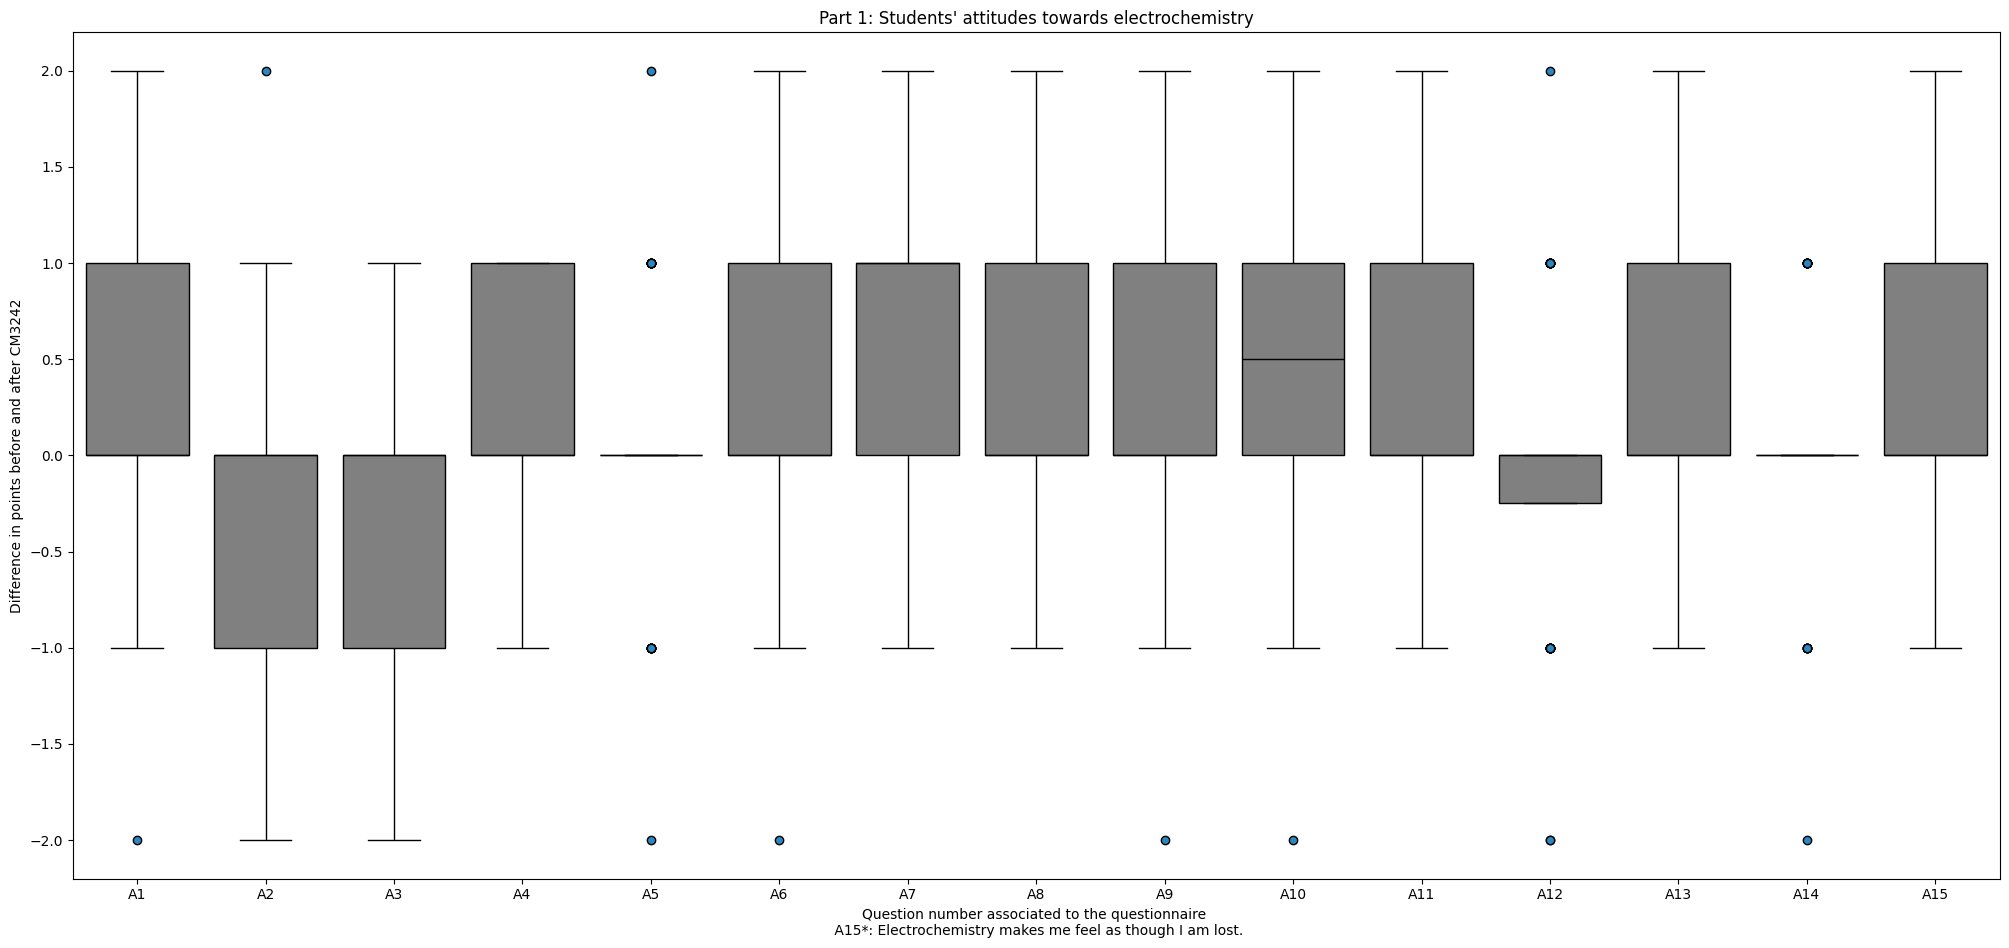

In [15]:
plt.figure(figsize=(20, 9))

# Use a single color for the boxplot with black edges
sns.boxplot(
    data=pre_course_q3, 
    order=opinion_order,
    color='grey',  # Single color for boxes
    flierprops={'marker': 'o', 'markerfacecolor': '#2E86C1', 'markeredgecolor': 'black'},  # Outlier points
    medianprops={'color': 'black'},  # Median line color
    boxprops={'edgecolor': 'black'},  # Box edge color
    whiskerprops={'color': 'black'},  # Whisker color
    capprops={'color': 'black'}  # Cap color
)

plt.tight_layout()
plt.title("Part 1: Students' attitudes towards electrochemistry")
plt.xlabel("Question number associated to the questionnaire \n A15*: Electrochemistry makes me feel as though I am lost.")
plt.ylabel("Difference in points before and after CM3242")

plt.savefig("Attitudes Graph.png", bbox_inches='tight')
plt.show()

For Cronbach's Alpha, we will measure the alpha of the different groups according to the way they are supposed to be grouped together

We will do this in terms of before and after, and then the groups according to the document

In [12]:
import pingouin as pg

pre_course_alpha = pg.cronbach_alpha(data = pre_course_q3)
post_course_alpha = pg.cronbach_alpha(data=post_course_q3)
print(f"Cronbach's Alpha for pre-course (general): {pre_course_alpha[0]}")
print(f"Cronbach's Alpha for post-course (general): {post_course_alpha[0]}")

Cronbach's Alpha for pre-course (general): 0.7971766397407472
Cronbach's Alpha for post-course (general): 0.8507139143376153


In [13]:

tests_texts = ["attitude in electrochemistry lessons", "attitude in electrochemistry labs", "beliefs in electrochemistry", "tendencies to learn electrochemistry", "anxieties about electrochemistry"]

for i in range(len(tests)):
    test = tests[i]
    test_text = tests_texts[i]
    pre_course_test = pre_course_q3[test]
    post_course_test = post_course_q3[test]

    pre_course_alpha = pg.cronbach_alpha(data = pre_course_test)
    post_course_alpha = pg.cronbach_alpha(data = post_course_test)

    print(f"Pre-course Cronbach's Alpha of {test_text}: {pre_course_alpha[0]}")
    print(f"Post-course Cronbach's Alpha of {test_text}: {post_course_alpha[0]}")
    print("\n")

Pre-course Cronbach's Alpha of attitude in electrochemistry lessons: 0.7794593648849619
Post-course Cronbach's Alpha of attitude in electrochemistry lessons: 0.8626802884615384


Pre-course Cronbach's Alpha of attitude in electrochemistry labs: 0.7697533071147659
Post-course Cronbach's Alpha of attitude in electrochemistry labs: 0.8310724496623881


Pre-course Cronbach's Alpha of beliefs in electrochemistry: 0.6817904993909865
Post-course Cronbach's Alpha of beliefs in electrochemistry: 0.5607202680067002


Pre-course Cronbach's Alpha of tendencies to learn electrochemistry: 0.6583850931677019
Post-course Cronbach's Alpha of tendencies to learn electrochemistry: 0.8650525525525526


Pre-course Cronbach's Alpha of anxieties about electrochemistry: 0.2006093649775495
Post-course Cronbach's Alpha of anxieties about electrochemistry: -0.04444153120083916


